In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from numpy import log
from pandas import Series
from datetime import datetime

In [3]:
df= pd.read_csv('E:\\LEARNBAY\\Time Series\\airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Month                    144 non-null    object
 1   Thousands of Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [7]:
# Changing the MOnth to datetime format. 

df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [8]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [9]:
df.set_index('Month',inplace=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot:xlabel='Month'>

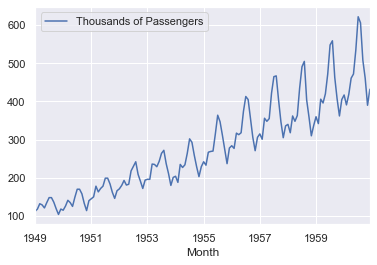

In [10]:
df.plot()

In [11]:
#Zenith Point - Top Point
# Nadir Point - Lowest Point

# DECOMPOSITION

seeing the data---it looks additive. 

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_add_decompose = seasonal_decompose(df['Thousands of Passengers'],model='additive',period=12)

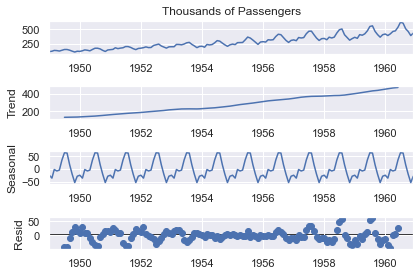

In [21]:
df_add_decompose.plot()
plt.show()

In [23]:
# JUST DOING THE MULTIPLICATIVE DECOMPOSITION TO SEE THE RESIDUAL....IT TELLS THE DATA IS NOT MULTIPLICATIVE.

In [25]:
df_mul_decompose = seasonal_decompose(df['Thousands of Passengers'],period=12,model='multiplicative')
df_mul_decompose

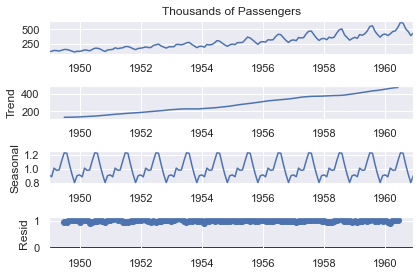

In [26]:
df_mul_decompose.plot()
plt.show()

# DURBIN WATSON TEST

In [27]:
import statsmodels.api as sm
sm.stats.durbin_watson(df['Thousands of Passengers'])

0.0121527966037621

This value is very less....there is correlation with self...
there is positive autocorrelation. 

If the value is soo less, we are sure about one thing that this is not a regression problem. Rather it is a pure time series forecasting problem. 

# TIME SERIES IS STATIONARY

PLease make sure that the time series is stationary or not-stationary..

- To check we do AUGUMENTED DICKEY FULLER TEST : To check whether we are accepting the alternate hypothesis or not.

- 

#  AUGUMENTED DICKEY FULLER TEST

In [29]:
from statsmodels.tsa.stattools import adfuller

adfuller(df['Thousands of Passengers'])

(0.8153688792060463,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [36]:
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("Augumented Dickey Fuller Test : To find if data is stationary or not stationary\n")
    labels = ['ADF Stats Test', 'p-Values','#Lags','No. of Observations']
    
    
    for i, j in zip(result,labels):
        print(j+ ' = '+ str(i))
        
    if result[1] <= 0.05:
        print("\nSTRONG EVIDENCE against null hypothesis and the time series is - STATIONARY")
    else:
        print('\nWEAK EVIDENCE against null hypothesis and the time series is NON STATIONARY')

In [37]:
adf_check(df['Thousands of Passengers'])

Augumented Dickey Fuller Test : To find if data is stationary or not stationary

ADF Stats Test = 0.8153688792060463
p-Values = 0.991880243437641
#Lags = 13
No. of Observations = 130

WEAK EVIDENCE against null hypothesis and the time series is NON STATIONARY


In [38]:
df['1st Diff'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [42]:
df.head()

,Thousands of Passengers,1st Diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


# REMINDER - TIME SERIES CAN"T WORK WITH MISSING DATA


- we have one NAN value in the above list. Be careful about that.

In [41]:
adf_check(df['1st Diff'].dropna())

Augumented Dickey Fuller Test : To find if data is stationary or not stationary

ADF Stats Test = -2.8292668241699923
p-Values = 0.054213290283826474
#Lags = 12
No. of Observations = 130

WEAK EVIDENCE against null hypothesis and the time series is NON STATIONARY


Still the time series is non stationary...we will further do lag modification and check. 

In [43]:
df['2nd Diff'] = df['1st Diff'] - df['1st Diff'].shift(1)
df.head()

,Thousands of Passengers,1st Diff,2nd Diff
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,8.0
1949-04-01,129,-3.0,-17.0
1949-05-01,121,-8.0,-5.0


In [44]:
adf_check(df['2nd Diff'].dropna())

Augumented Dickey Fuller Test : To find if data is stationary or not stationary

ADF Stats Test = -16.384231542468516
p-Values = 2.7328918500141235e-29
#Lags = 11
No. of Observations = 130

STRONG EVIDENCE against null hypothesis and the time series is - STATIONARY


#### NOW THE DATASET GOT STATIONARY. 

We can see that the -value is very very very less....e-29....so much less than 0.05. 
Hence, we accept the alternate hypothesis.
p-value low, H0 Go. 

so we reject the null hypothesis. 

# ARIMA

##### Trend : p d q

p:

d: 2 --- two times difference calculation happened....hence this value is 2. If the data is stationary, this will be equal to 0.

q:

#### To find out the seasonality lag...

we are going to shift the data by 12 months...we compare how the sale was in last Jan and this jan...so that is why 12 shifts. 

In [45]:
df['Seasonality'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [46]:
df.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN


In [47]:
adf_check(df['Seasonality'].dropna())

Augumented Dickey Fuller Test : To find if data is stationary or not stationary

ADF Stats Test = -3.383020726492481
p-Values = 0.011551493085514954
#Lags = 1
No. of Observations = 130

STRONG EVIDENCE against null hypothesis and the time series is - STATIONARY


 Trend::
            
p : # Partial AUtocorrelation

d : 2 # Augumented Dickey Fuller Test
    
q : # AUtocorrelation
    
Seasonality ::
        
P : 

D : 1

Q :
    

In [50]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

# TREND

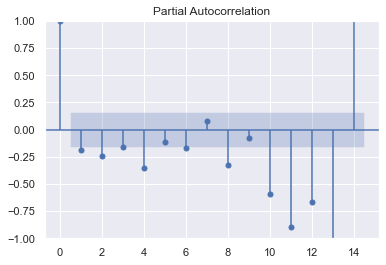

In [54]:
plot_pacf(df['2nd Diff'].dropna(),lags=14)
plt.show()

 Trend::
            
p : 4 # Partial AUtocorrelation  ---- we will look till the point is within the neutral range. Once we find the neutral range, we will stop the search. Here, we see that the 1st four points are more than -0.2 ...but the 5th point is within the -0.2 to 0.2 range. So, before that 4 points...hence p-value is 4. 

d : 2 # Augumented Dickey Fuller Test
    
q : # AUtocorrelation
    
Seasonality ::
        
P : 

D : 1

Q :

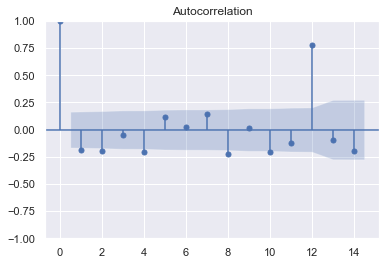

In [56]:
plot_acf(df['2nd Diff'].dropna(),lags=14)
plt.show()

Trend::
            
p : 4 # Partial AUtocorrelation PACF ---- we will look till the point is within the neutral range. Once we find the neutral range, we will stop the search. Here, we see that the 1st four points are more than -0.2 ...but the 5th point is within the -0.2 to 0.2 range. So, before that 4 points...hence p-value is 4. 

d : 2 # Augumented Dickey Fuller Test
    
q : 2 # AUtocorrelation  -- ACF --- so we do similar kind of analysis as we did for p....we get neutral point after 2 points...hence q = 2. 
    
Seasonality ::
        
P : 

D : 1

Q :

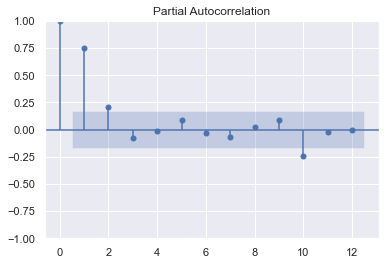

In [59]:
plot_pacf(df['Seasonality'].dropna(),lags=12)
plt.show()

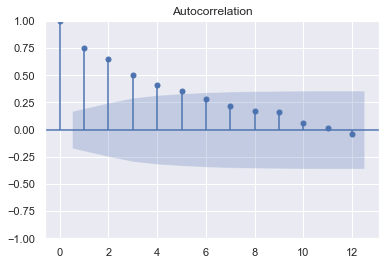

In [60]:
plot_acf(df['Seasonality'].dropna(),lags=12)
plt.show()

In [ ]:
Trend::
            
p : 4 # Partial AUtocorrelation PACF ---- we will look till the point is within the neutral range. Once we find the neutral range, we will stop the search. Here, we see that the 1st four points are more than -0.2 ...but the 5th point is within the -0.2 to 0.2 range. So, before that 4 points...hence p-value is 4. 

d : 2 # Augumented Dickey Fuller Test
    
q : 2 # AUtocorrelation  -- ACF --- so we do similar kind of analysis as we did for p....we get neutral point after 2 points...hence q = 2. 
    
Seasonality ::
        
P : 2 - PACF PLOT --- we don't count the 1st one -- that is the actual data kaa graph. 

D : 1

Q : 5

# ARIMA MODEL

In [61]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [62]:
# NEVER USE TREND AND SEASONALITY PARAMETERS RANDOMLY...IT SHOULD BE CALCULATED.
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'],order=(4,2,2),
                                 seasonal_order=(2,1,5,12))

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [63]:
result = model.fit()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
print(result.summary())

                                            SARIMAX Results                                             
Dep. Variable:                          Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4, 5], 12)   Log Likelihood                -496.742
Date:                                          Fri, 19 May 2023   AIC                           1021.484
Time:                                                  05:09:42   BIC                           1061.629
Sample:                                              01-01-1949   HQIC                          1037.796
                                                   - 12-01-1960                                         
Covariance Type:                                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar

##### AIC VALUES -- for different q values.   -2LL +2K == (-2 Loglikelihood + 2 parameters(pdq))

AIC - 1015.567 For seasonal_order=(2,1,1,12) --- Best
AIC - 1017.566 for seasonal_order=(2,1,2,12)
AIC - 1018.377 for seasonal_order=(2,1,3,12)
AIC - 1020.039 for seasonal_order=(2,1,4,12)
AIC - 1021.484 for seasonal_order=(2,1,5,12)

Lesser the AIC value, better the model. 


In [ ]:
model = sm.tsa.state

In [73]:
model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'],order=(4,2,2),seasonal_order=(2,1,4,12))
result = model.fit()

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [74]:
print(result.summary())

                                           SARIMAX Results                                           
Dep. Variable:                       Thousands of Passengers   No. Observations:                  144
Model:             SARIMAX(4, 2, 2)x(2, 1, [1, 2, 3, 4], 12)   Log Likelihood                -497.019
Date:                                       Fri, 19 May 2023   AIC                           1020.039
Time:                                               06:16:03   BIC                           1057.317
Sample:                                           01-01-1949   HQIC                          1035.186
                                                - 12-01-1960                                         
Covariance Type:                                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3717     

In [75]:
df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality
Month,,,,
1960-08-01,606,-16.0,-103.0,47.0
1960-09-01,508,-98.0,-82.0,45.0
1960-10-01,461,-47.0,51.0,54.0
1960-11-01,390,-71.0,-24.0,28.0
1960-12-01,432,42.0,113.0,27.0


In [ ]:
# I need to predict next 5 years kaa data...but before htat we need to validate the data.

In [76]:
len(df)

144

# VALIDATION

<AxesSubplot:xlabel='Month'>

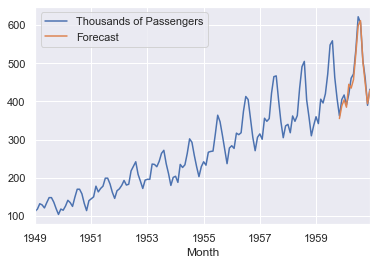

In [77]:
df['Forecast'] = result.predict(start=130,end=144,dynamic = True)

df[['Thousands of Passengers','Forecast']].plot()

In [80]:
# Auto approach

import itertools

p=d=q= range(0,2) # Giviing min and max range...based on the analysis. 
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

print("Few parameter combinations are: ")
print('{} x {}'.format(pdq[1],seasonal_pdq[1]))
print('{} x {}'.format(pdq[2],seasonal_pdq[2]))
print('{} x {}'.format(pdq[0],seasonal_pdq[0]))

Few parameter combinations are: 
(0, 0, 1) x (0, 0, 1, 12)
(0, 1, 0) x (0, 1, 0, 12)
(0, 0, 0) x (0, 0, 0, 12)


In [81]:
for param_trend in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df['Thousands of Passengers'],order=param_trend,
                                             seasonal_order=param_seasonal,enforce_stationarity=False,
                                              enforce_invertibility=False)
            
            result=model.fit()
            print("ARIMA {}x{} - AIC:{}".format(param_trend,param_seasonal,result.aic))
        except:
            continue

C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.w

ARIMA (0, 0, 0)x(0, 0, 0, 12) - AIC:2044.4329486427587
ARIMA (0, 0, 0)x(0, 0, 1, 12) - AIC:1887.3379660576095
ARIMA (0, 0, 0)x(0, 1, 0, 12) - AIC:1315.9211929474204
ARIMA (0, 0, 0)x(0, 1, 1, 12) - AIC:1156.291490150854
ARIMA (0, 0, 0)x(1, 0, 0, 12) - AIC:1118.6259190717344
ARIMA (0, 0, 0)x(1, 0, 1, 12) - AIC:1107.2562043222977
ARIMA (0, 0, 0)x(1, 1, 0, 12) - AIC:1109.2437994445113


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (0, 0, 0)x(1, 1, 1, 12) - AIC:1033.6172166730046
ARIMA (0, 0, 1)x(0, 0, 0, 12) - AIC:1846.0789377571637
ARIMA (0, 0, 1)x(0, 0, 1, 12) - AIC:1567.9916312321363


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (0, 0, 1)x(0, 1, 0, 12) - AIC:1196.998361439977
ARIMA (0, 0, 1)x(0, 1, 1, 12) - AIC:1072.1382984044333


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1)x(1, 0, 0, 12) - AIC:1071.0026811100304


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1)x(1, 0, 1, 12) - AIC:1049.580141847072
ARIMA (0, 0, 1)x(1, 1, 0, 12) - AIC:1059.5112223290407


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 0, 1)x(1, 1, 1, 12) - AIC:985.33464780324
ARIMA (0, 1, 0)x(0, 0, 0, 12) - AIC:1405.0006612949667
ARIMA (0, 1, 0)x(0, 0, 1, 12) - AIC:1194.7130010979654
ARIMA (0, 1, 0)x(0, 1, 0, 12) - AIC:1024.4816429833895
ARIMA (0, 1, 0)x(0, 1, 1, 12) - AIC:937.7995265380558


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (0, 1, 0)x(1, 0, 0, 12) - AIC:1031.4838983661914
ARIMA (0, 1, 0)x(1, 0, 1, 12) - AIC:1015.0000347580002
ARIMA (0, 1, 0)x(1, 1, 0, 12) - AIC:944.4876301158417


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (0, 1, 0)x(1, 1, 1, 12) - AIC:939.7984372654356
ARIMA (0, 1, 1)x(0, 0, 0, 12) - AIC:1379.4417180072915
ARIMA (0, 1, 1)x(0, 0, 1, 12) - AIC:1181.6309458759208
ARIMA (0, 1, 1)x(0, 1, 0, 12) - AIC:1006.7919047396908


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (0, 1, 1)x(0, 1, 1, 12) - AIC:920.6308317604736
ARIMA (0, 1, 1)x(1, 0, 0, 12) - AIC:1014.2239031825106


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1)x(1, 0, 1, 12) - AIC:985.1362335461189
ARIMA (0, 1, 1)x(1, 1, 0, 12) - AIC:934.7975425749156


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (0, 1, 1)x(1, 1, 1, 12) - AIC:920.3192974989616
ARIMA (1, 0, 0)x(0, 0, 0, 12) - AIC:1415.9068815931885
ARIMA (1, 0, 0)x(0, 0, 1, 12) - AIC:1205.3907786172608


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 

ARIMA (1, 0, 0)x(0, 1, 0, 12) - AIC:1029.9773091700768
ARIMA (1, 0, 0)x(0, 1, 1, 12) - AIC:944.3854921533135


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0)x(1, 0, 0, 12) - AIC:1017.315549356958


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0)x(1, 0, 1, 12) - AIC:1007.0272556234527
ARIMA (1, 0, 0)x(1, 1, 0, 12) - AIC:944.0441660826771


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 0)x(1, 1, 1, 12) - AIC:945.4400866794205
ARIMA (1, 0, 1)x(0, 0, 0, 12) - AIC:1390.4515018414754
ARIMA (1, 0, 1)x(0, 0, 1, 12) - AIC:1192.2949631619501
ARIMA (1, 0, 1)x(0, 1, 0, 12) - AIC:1014.2547824623741


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (1, 0, 1)x(0, 1, 1, 12) - AIC:929.4329707892175
ARIMA (1, 0, 1)x(1, 0, 0, 12) - AIC:1009.5891017293828


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (1, 0, 1)x(1, 0, 1, 12) - AIC:989.1764738053093
ARIMA (1, 0, 1)x(1, 1, 0, 12) - AIC:935.816334821836


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 0, 1)x(1, 1, 1, 12) - AIC:935.91528605551
ARIMA (1, 1, 0)x(0, 0, 0, 12) - AIC:1392.9437938537153
ARIMA (1, 1, 0)x(0, 0, 1, 12) - AIC:1190.5342929076237
ARIMA (1, 1, 0)x(0, 1, 0, 12) - AIC:1013.3680449838143


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (1, 1, 0)x(0, 1, 1, 12) - AIC:928.1312837305587
ARIMA (1, 1, 0)x(1, 0, 0, 12) - AIC:1007.6496486407755


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0)x(1, 0, 1, 12) - AIC:995.4636249454074
ARIMA (1, 1, 0)x(1, 1, 0, 12) - AIC:927.5904374710256


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 0)x(1, 1, 1, 12) - AIC:928.141862018542
ARIMA (1, 1, 1)x(0, 0, 0, 12) - AIC:1377.2926858930787


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1)x(0, 0, 1, 12) - AIC:1185.3340359694694
ARIMA (1, 1, 1)x(0, 1, 0, 12) - AIC:1008.5528813485417
ARIMA (1, 1, 1)x(0, 1, 1, 12) - AIC:922.4148960116213


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  

ARIMA (1, 1, 1)x(1, 0, 0, 12) - AIC:1009.1896100685519
ARIMA (1, 1, 1)x(1, 0, 1, 12) - AIC:987.1339264652809


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


ARIMA (1, 1, 1)x(1, 1, 0, 12) - AIC:929.5756208330467
ARIMA (1, 1, 1)x(1, 1, 1, 12) - AIC:922.2053774351995


C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Swarn\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# PREDICT FUTURE with new timesteps

In [84]:
df.tail(1)

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
Month,,,,,
1960-12-01,432,42.0,113.0,27.0,428.817179


In [83]:
from pandas.tseries.offsets import DateOffset

In [87]:
future_data = [df.index[-1] + DateOffset(months = x) for x in range(0,61)]

In [88]:
future_data

[Timestamp('1960-12-01 00:00:00'),
 Timestamp('1961-01-01 00:00:00'),
 Timestamp('1961-02-01 00:00:00'),
 Timestamp('1961-03-01 00:00:00'),
 Timestamp('1961-04-01 00:00:00'),
 Timestamp('1961-05-01 00:00:00'),
 Timestamp('1961-06-01 00:00:00'),
 Timestamp('1961-07-01 00:00:00'),
 Timestamp('1961-08-01 00:00:00'),
 Timestamp('1961-09-01 00:00:00'),
 Timestamp('1961-10-01 00:00:00'),
 Timestamp('1961-11-01 00:00:00'),
 Timestamp('1961-12-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1962-02-01 00:00:00'),
 Timestamp('1962-03-01 00:00:00'),
 Timestamp('1962-04-01 00:00:00'),
 Timestamp('1962-05-01 00:00:00'),
 Timestamp('1962-06-01 00:00:00'),
 Timestamp('1962-07-01 00:00:00'),
 Timestamp('1962-08-01 00:00:00'),
 Timestamp('1962-09-01 00:00:00'),
 Timestamp('1962-10-01 00:00:00'),
 Timestamp('1962-11-01 00:00:00'),
 Timestamp('1962-12-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1963-02-01 00:00:00'),
 Timestamp('1963-03-01 00:00:00'),
 Timestamp('1963-04-

In [89]:
future_data_df = pd.DataFrame(index = future_data[1:],columns = df.columns)

In [90]:
future_data_df.tail()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1965-08-01,NaN,NaN,NaN,NaN,NaN
1965-09-01,NaN,NaN,NaN,NaN,NaN
1965-10-01,NaN,NaN,NaN,NaN,NaN
1965-11-01,NaN,NaN,NaN,NaN,NaN
1965-12-01,NaN,NaN,NaN,NaN,NaN


In [91]:
future_pred = pd.concat([df,future_data_df])

In [92]:
future_pred.head()

,Thousands of Passengers,1st Diff,2nd Diff,Seasonality,Forecast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN


In [94]:
print(len(df))
print(len(future_pred))

144
204


# Predicting the future data

<AxesSubplot:>

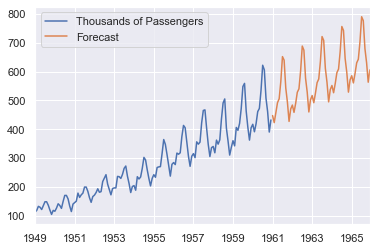

In [95]:
future_pred['Forecast'] = result.predict(start=144,end=204,dynamic=True)
future_pred[['Thousands of Passengers','Forecast']].plot()

In [96]:
future_pred.to_csv("Airlines Passengenger Prediction.csv")

In [98]:
# import os
# os.getcwd()

# DONE